# Optimising Health Service Capacity in the Post-covid Era

### Data Pre-precessing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('./Output.csv', parse_dates=['Appointment_Date'], index_col='Appointment_Date')
df.head()

,Region,NHS 111 Area code,CCG_ONS_CODE,COUNT_OF_APPOINTMENTS,A&E attendances Type 2,A&E attendances Type 1,A&E attendances Other A&E Department,Ambulance final dispositions,Recommend to A&E,111-N of calls,Ambulance-Calls answered
Appointment_Date,,,,,,,,,,,
2021-01-04,South East,111AI1,E38000021,5894,316.400000,5293.200000,1709.000000,NaN,NaN,NaN,118577
2021-06-16,North East & Yorkshire,111AD9,E38000146,13830,121.000000,11754.500000,1216.166667,NaN,NaN,NaN,103874
2021-06-16,North East & Yorkshire,111AD9,E38000188,6681,59.166667,10449.666667,3000.833333,NaN,NaN,NaN,103874
2021-06-16,North East & Yorkshire,111AD9,E38000122,4236,0.000000,10433.333333,4218.166667,NaN,NaN,NaN,103874
2021-06-16,North East & Yorkshire,111AD9,E38000190,5854,72.600000,10745.100000,2708.500000,NaN,NaN,NaN,103874


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91388 entries, 2021-01-04 to 2019-05-22
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Region                                91388 non-null  object 
 1   NHS 111 Area code                     91388 non-null  object 
 2   CCG_ONS_CODE                          91388 non-null  object 
 3   COUNT_OF_APPOINTMENTS                 91388 non-null  int64  
 4   A&E attendances Type 2                91388 non-null  float64
 5   A&E attendances Type 1                91388 non-null  float64
 6   A&E attendances Other A&E Department  91388 non-null  float64
 7   Ambulance final dispositions          58934 non-null  float64
 8   Recommend to A&E                      53234 non-null  float64
 9   111-N of calls                        58934 non-null  float64
 10  Ambulance-Calls answered              91388 non-null  int64  
dty

In [3]:
df.isnull().sum()

Region                                      0
NHS 111 Area code                           0
CCG_ONS_CODE                                0
COUNT_OF_APPOINTMENTS                       0
A&E attendances Type 2                      0
A&E attendances Type 1                      0
A&E attendances Other A&E Department        0
Ambulance final dispositions            32454
Recommend to A&E                        38154
111-N of calls                          32454
Ambulance-Calls answered                    0
dtype: int64

From the previous analysis, Ambulance final dispositions, Recommend to A&E, 111-N of calls have null values, we will use ffill() to fill the null with the previous value.

In [4]:
df=df.sort_index()
df=df.ffill()
df

,Region,NHS 111 Area code,CCG_ONS_CODE,COUNT_OF_APPOINTMENTS,A&E attendances Type 2,A&E attendances Type 1,A&E attendances Other A&E Department,Ambulance final dispositions,Recommend to A&E,111-N of calls,Ambulance-Calls answered
Appointment_Date,,,,,,,,,,,
2018-12-01,North East & Yorkshire,111AA1,E38000127,56,854.750000,9019.500000,5690.500000,434.0,251.0,4303.0,97454
2018-12-01,Midlands,111AF4,E38000175,160,138.333333,6952.000000,3419.000000,149.0,57.0,1524.0,158633
2018-12-01,Midlands,111AF4,E38000053,22,207.500000,16444.500000,7888.500000,149.0,57.0,1524.0,158633
2018-12-01,North West,111AF8,E38000174,433,386.727273,7237.454545,4897.090909,855.0,409.0,8536.0,109551
2018-12-01,North West,111AF8,E38000172,139,169.363636,4548.636364,3500.727273,855.0,409.0,8536.0,109551
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,North West,111AF8,E38000143,6192,417.428571,9060.000000,2333.857143,590.0,569.0,5855.0,115557
2022-05-31,North West,111AF8,E38000226,4299,37.833333,10307.500000,7279.000000,590.0,569.0,5855.0,115557
2022-05-31,North West,111AF8,E38000187,3632,487.000000,11223.333333,4335.666667,590.0,569.0,5855.0,115557


In terms of the categorical features, which are NHS 111 Area code, CCG_ONS_CODE and Region, we need to convert them into integer for futher analysis or delete them if they have too many values.

In [5]:
df['Region'].unique()

array(['North East & Yorkshire', 'Midlands', 'North West', 'South West',
       'East of England', 'South East'], dtype=object)

In [6]:
region_mapping={'North East & Yorkshire':0, 'Midlands':1, 'North West':2, 'South West':3,'East of England':4, 'South East':5}
df['Region']=df['Region'].map(region_mapping)
df.head()

,Region,NHS 111 Area code,CCG_ONS_CODE,COUNT_OF_APPOINTMENTS,A&E attendances Type 2,A&E attendances Type 1,A&E attendances Other A&E Department,Ambulance final dispositions,Recommend to A&E,111-N of calls,Ambulance-Calls answered
Appointment_Date,,,,,,,,,,,
2018-12-01,0,111AA1,E38000127,56,854.750000,9019.500000,5690.500000,434.0,251.0,4303.0,97454
2018-12-01,1,111AF4,E38000175,160,138.333333,6952.000000,3419.000000,149.0,57.0,1524.0,158633
2018-12-01,1,111AF4,E38000053,22,207.500000,16444.500000,7888.500000,149.0,57.0,1524.0,158633
2018-12-01,2,111AF8,E38000174,433,386.727273,7237.454545,4897.090909,855.0,409.0,8536.0,109551
2018-12-01,2,111AF8,E38000172,139,169.363636,4548.636364,3500.727273,855.0,409.0,8536.0,109551


In [7]:
areas=df['NHS 111 Area code'].unique()

In [8]:
area_mapping={}
i=0
for a in areas:
    area_mapping[a]=i
    i=i+1
df['NHS 111 Area code']=df['NHS 111 Area code'].map(area_mapping)
df.head()

,Region,NHS 111 Area code,CCG_ONS_CODE,COUNT_OF_APPOINTMENTS,A&E attendances Type 2,A&E attendances Type 1,A&E attendances Other A&E Department,Ambulance final dispositions,Recommend to A&E,111-N of calls,Ambulance-Calls answered
Appointment_Date,,,,,,,,,,,
2018-12-01,0,0,E38000127,56,854.750000,9019.500000,5690.500000,434.0,251.0,4303.0,97454
2018-12-01,1,1,E38000175,160,138.333333,6952.000000,3419.000000,149.0,57.0,1524.0,158633
2018-12-01,1,1,E38000053,22,207.500000,16444.500000,7888.500000,149.0,57.0,1524.0,158633
2018-12-01,2,2,E38000174,433,386.727273,7237.454545,4897.090909,855.0,409.0,8536.0,109551
2018-12-01,2,2,E38000172,139,169.363636,4548.636364,3500.727273,855.0,409.0,8536.0,109551


As there are too many categorical values in CCG_ONS_CODE, we will remove this feature.

In [9]:
#df=df.drop(['CCG_ONS_CODE'],axis=1)
#df.head()

When it comes to the normalisation of the dataset, we will apply MinMaxScaler() to the features.

In [10]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
df.iloc[:,3:]=min_max_scaler.fit_transform(df.iloc[:,3:])
df.head()

,Region,NHS 111 Area code,CCG_ONS_CODE,COUNT_OF_APPOINTMENTS,A&E attendances Type 2,A&E attendances Type 1,A&E attendances Other A&E Department,Ambulance final dispositions,Recommend to A&E,111-N of calls,Ambulance-Calls answered
Appointment_Date,,,,,,,,,,,
2018-12-01,0,0,E38000127,0.001409,0.802206,0.455569,0.515841,0.419729,0.242982,0.248326,0.237308
2018-12-01,1,1,E38000175,0.004072,0.129830,0.351141,0.309931,0.144101,0.055179,0.087950,0.600627
2018-12-01,1,1,E38000053,0.000538,0.194744,0.830600,0.715089,0.144101,0.055179,0.087950,0.600627
2018-12-01,2,2,E38000174,0.011064,0.362954,0.365559,0.443919,0.826886,0.395934,0.492613,0.309147
2018-12-01,2,2,E38000172,0.003534,0.158952,0.229748,0.317339,0.826886,0.395934,0.492613,0.309147


----------------------------------------------------------------------------------------------------------------------

### Features Correlation

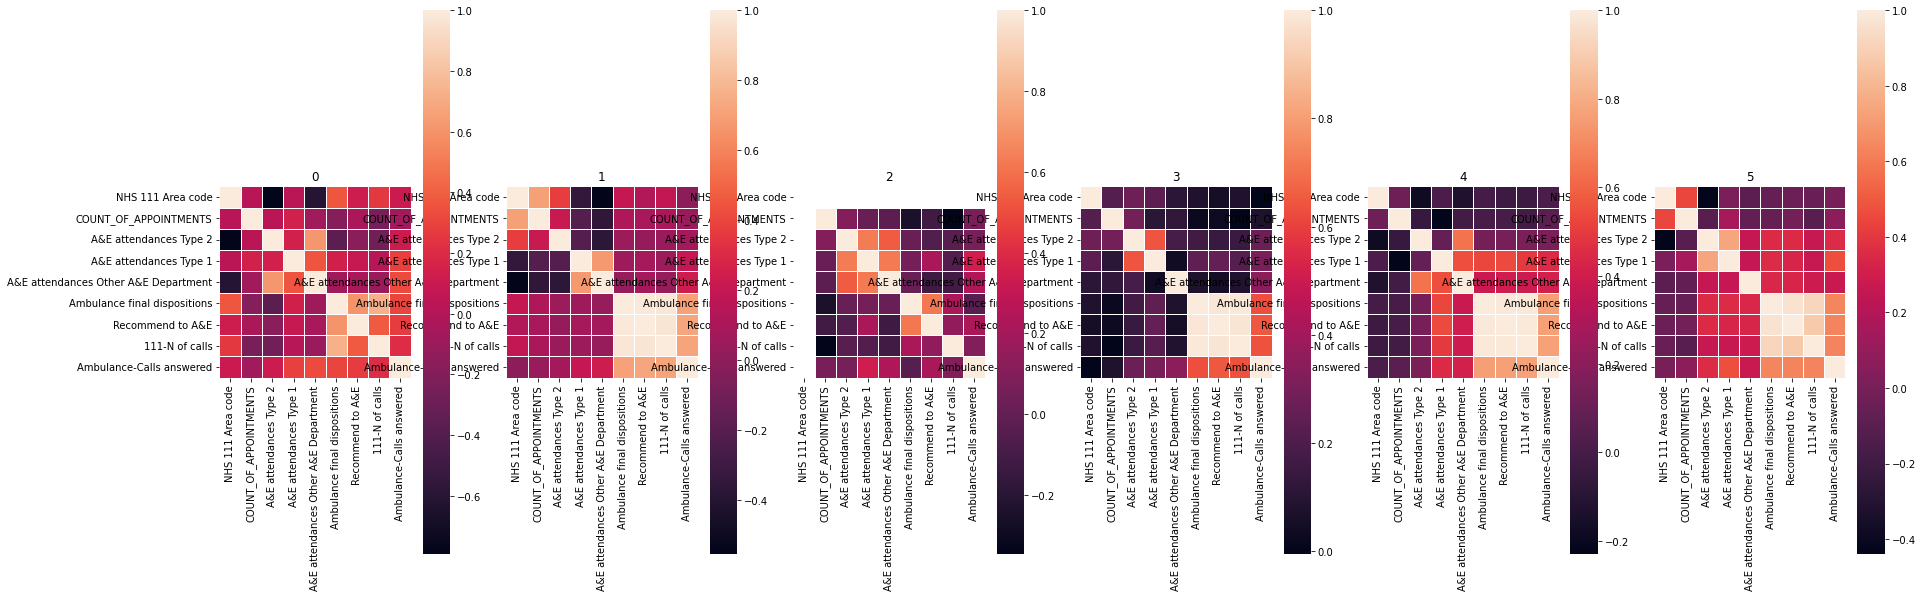

In [11]:
df.groupby(['Region']).corr()
regions=df['Region'].unique()
fig, axes = plt.subplots(1, len(regions), figsize=(30, 10))
for i, c in enumerate(regions):
    ax = sns.heatmap(df.groupby(['Region']).corr().xs(c), linewidths=1, ax = axes[i], square=True)
    ax.set_title(c)

<AxesSubplot:>

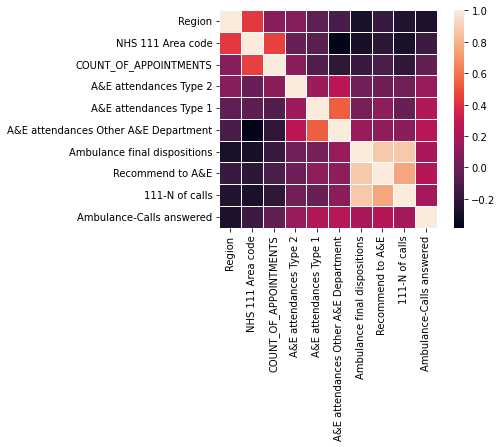

In [12]:
sns.heatmap(df.corr(), linewidths=1, square=True)

In [13]:
from statsmodels.tsa.stattools import grangercausalitytests
grangercausalitytests(df[['COUNT_OF_APPOINTMENTS', 'Ambulance-Calls answered']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=35.4338 , p=0.0000  , df_denom=91384, df_num=1
ssr based chi2 test:   chi2=35.4349 , p=0.0000  , df=1
likelihood ratio test: chi2=35.4281 , p=0.0000  , df=1
parameter F test:         F=35.4338 , p=0.0000  , df_denom=91384, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=59.6382 , p=0.0000  , df_denom=91381, df_num=2
ssr based chi2 test:   chi2=119.2829, p=0.0000  , df=2
likelihood ratio test: chi2=119.2052, p=0.0000  , df=2
parameter F test:         F=59.6382 , p=0.0000  , df_denom=91381, df_num=2


{1: ({'ssr_ftest': (35.43376088572893, 2.6483163595366785e-09, 91384.0, 1),
   'ssr_chi2test': (35.434924123086205, 2.6371567398425064e-09, 1),
   'lrtest': (35.42805602715816, 2.6464721423085017e-09, 1),
   'params_ftest': (35.43376088572334, 2.6483163595649987e-09, 91384.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (59.638203347289014, 1.307212568467346e-26, 91381.0, 2),
   'ssr_chi2test': (119.28293301879722, 1.2532571827536372e-26, 2),
   'lrtest': (119.2051527844742, 1.302956646608638e-26, 2),
   'params_ftest': (59.638203347268984, 1.3072125684934464e-26, 91381.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

We can learn from the result that the p-value is less than 0.05, so the count of appointments is useful for predicting the ambulance calls answered.

In [14]:
grangercausalitytests(df[['COUNT_OF_APPOINTMENTS', '111-N of calls']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=475.3605, p=0.0000  , df_denom=91384, df_num=1
ssr based chi2 test:   chi2=475.3761, p=0.0000  , df=1
likelihood ratio test: chi2=474.1440, p=0.0000  , df=1
parameter F test:         F=475.3605, p=0.0000  , df_denom=91384, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=172.3942, p=0.0000  , df_denom=91381, df_num=2
ssr based chi2 test:   chi2=344.8072, p=0.0000  , df=2
likelihood ratio test: chi2=344.1583, p=0.0000  , df=2
parameter F test:         F=172.3942, p=0.0000  , df_denom=91381, df_num=2


{1: ({'ssr_ftest': (475.3605135647319, 4.054773224315506e-105, 91384.0, 1),
   'ssr_chi2test': (475.3761189392032, 2.167204599977012e-105, 1),
   'lrtest': (474.1439862319967, 4.018050023430678e-105, 1),
   'params_ftest': (475.36051356475195, 4.054773224294993e-105, 91384.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (172.3941541281772, 1.8666418261158223e-75, 91381.0, 2),
   'ssr_chi2test': (344.80717368287947, 1.336821970240756e-75, 2),
   'lrtest': (344.1583118712879, 1.8491499350255833e-75, 2),
   'params_ftest': (172.39415412816592, 1.8666418261253717e-75, 91381.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [15]:
grangercausalitytests(df[['COUNT_OF_APPOINTMENTS', 'A&E attendances Type 1']], maxlag=2)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=181.6243, p=0.0000  , df_denom=91384, df_num=1
ssr based chi2 test:   chi2=181.6303, p=0.0000  , df=1
likelihood ratio test: chi2=181.4500, p=0.0000  , df=1
parameter F test:         F=181.6243, p=0.0000  , df_denom=91384, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=178.7851, p=0.0000  , df_denom=91381, df_num=2
ssr based chi2 test:   chi2=357.5898, p=0.0000  , df=2
likelihood ratio test: chi2=356.8920, p=0.0000  , df=2
parameter F test:         F=178.7851, p=0.0000  , df_denom=91381, df_num=2


{1: ({'ssr_ftest': (181.62430822438554, 2.346103235040397e-41, 91384.0, 1),
   'ssr_chi2test': (181.63027067869564, 2.1353779579108675e-41, 1),
   'lrtest': (181.45001577673247, 2.3379214071145205e-41, 1),
   'params_ftest': (181.62430822439782, 2.346103235017559e-41, 91384.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (178.78512680866598, 3.207174138239489e-78, 91381.0, 2),
   'ssr_chi2test': (357.58981842038827, 2.240564948773514e-78, 2),
   'lrtest': (356.8920206941548, 3.1760138571509526e-78, 2),
   'params_ftest': (178.78512680868127, 3.2071741381901747e-78, 91381.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

Therefore, we can learn that there are some correlations between the healthcare services based on these results.

We can transform the time series into supervised learning, through shifting the previous dates to the current row. Also, it is important to only shift the data that in the same area, which means they have the same CCG_ONS_CODE. Therefore, we should apply the function of 'groupby' to gather the data that in the same area, and then apply the algorithm 'series_to_supervised' to them respectively.

In [16]:
from pandas import concat, DataFrame
# reference: https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
# https://blog.csdn.net/Uwr44UOuQcNsUQb60zk2/article/details/78399110
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
        Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

Next, we re-organised the order of columns, so we can still keep the region, NHS 111 Area in the following steps.

In [17]:
columns=['CCG_ONS_CODE','Region', 'NHS 111 Area code','COUNT_OF_APPOINTMENTS','A&E attendances Type 2',
    'A&E attendances Type 1','A&E attendances Other A&E Department','Ambulance final dispositions',
    'Recommend to A&E','111-N of calls','Ambulance-Calls answered']
df=pd.DataFrame(df, columns=columns)
df.head()

,CCG_ONS_CODE,Region,NHS 111 Area code,COUNT_OF_APPOINTMENTS,A&E attendances Type 2,A&E attendances Type 1,A&E attendances Other A&E Department,Ambulance final dispositions,Recommend to A&E,111-N of calls,Ambulance-Calls answered
Appointment_Date,,,,,,,,,,,
2018-12-01,E38000127,0,0,0.001409,0.802206,0.455569,0.515841,0.419729,0.242982,0.248326,0.237308
2018-12-01,E38000175,1,1,0.004072,0.129830,0.351141,0.309931,0.144101,0.055179,0.087950,0.600627
2018-12-01,E38000053,1,1,0.000538,0.194744,0.830600,0.715089,0.144101,0.055179,0.087950,0.600627
2018-12-01,E38000174,2,2,0.011064,0.362954,0.365559,0.443919,0.826886,0.395934,0.492613,0.309147
2018-12-01,E38000172,2,2,0.003534,0.158952,0.229748,0.317339,0.826886,0.395934,0.492613,0.309147


We will apply the method for the dataset and use the data three days before.

In [18]:
codes=df['CCG_ONS_CODE'].unique()
grouped=df.groupby(['CCG_ONS_CODE'])
data=pd.DataFrame()
for c in codes:
    ccg=grouped.get_group(c)
    transformed=series_to_supervised(ccg.iloc[:,1:],3,1)
    data=concat([data,transformed],axis=0)
    
data=data.drop(['var1(t-3)','var1(t-2)','var1(t-1)','var2(t-3)','var2(t-2)','var2(t-1)'],axis=1)
data.rename(columns = {"var1(t)": "Region", "var2(t)":"NHS 111 Area"},  inplace=True)
pd.set_option('display.max_columns', None)
data

,var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),Region,NHS 111 Area,var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
Appointment_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-05,0.001409,0.802206,0.455569,0.515841,0.419729,0.242982,0.248326,0.237308,0.123114,0.802206,0.455569,0.515841,0.333656,0.227493,0.166724,0.237308,0.116225,0.802206,0.455569,0.515841,0.327853,0.222652,0.141390,0.237308,0,0,0.101934,0.802206,0.455569,0.515841,0.337524,0.208132,0.146814,0.237308
2018-12-06,0.123114,0.802206,0.455569,0.515841,0.333656,0.227493,0.166724,0.237308,0.116225,0.802206,0.455569,0.515841,0.327853,0.222652,0.141390,0.237308,0.101934,0.802206,0.455569,0.515841,0.337524,0.208132,0.146814,0.237308,0,0,0.105212,0.802206,0.455569,0.515841,0.346228,0.209100,0.145891,0.237308
2018-12-07,0.116225,0.802206,0.455569,0.515841,0.327853,0.222652,0.141390,0.237308,0.101934,0.802206,0.455569,0.515841,0.337524,0.208132,0.146814,0.237308,0.105212,0.802206,0.455569,0.515841,0.346228,0.209100,0.145891,0.237308,0,0,0.103240,0.802206,0.455569,0.515841,0.334623,0.175218,0.137177,0.237308
2018-12-08,0.101934,0.802206,0.455569,0.515841,0.337524,0.208132,0.146814,0.237308,0.105212,0.802206,0.455569,0.515841,0.346228,0.209100,0.145891,0.237308,0.103240,0.802206,0.455569,0.515841,0.334623,0.175218,0.137177,0.237308,0,0,0.001998,0.802206,0.455569,0.515841,0.474855,0.206196,0.252366,0.237308
2018-12-10,0.105212,0.802206,0.455569,0.515841,0.346228,0.209100,0.145891,0.237308,0.103240,0.802206,0.455569,0.515841,0.334623,0.175218,0.137177,0.237308,0.001998,0.802206,0.455569,0.515841,0.474855,0.206196,0.252366,0.237308,0,0,0.120963,0.802206,0.455569,0.515841,0.329787,0.224589,0.162396,0.237308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-26,0.216212,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815,0.200333,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815,0.188142,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815,2,2,0.190216,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815
2022-05-27,0.200333,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815,0.188142,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815,0.190216,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815,2,2,0.181227,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815
2022-05-28,0.188142,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815,0.190216,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815,0.181227,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815,2,2,0.007043,0.294271,0.524714,0.497204,0.570600,0.550823,0.337892,0.344815


In [19]:
data=data.iloc[:,:-7]

### Data Split

We will try to make predictions for the count of GP appointments at first.

In order to investigate the capacity of different services according to the COVID-19 period, the whole dataset will be divided into three parts according to the timeline. For instance, 

In [20]:
train=data.loc['2018':'2020']
train=train.sort_index()
train

/var/folders/pm/hrr1nn8n6cz4tl900__1d1nh0000gn/T/ipykernel_26562/2506137494.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  train=data.loc['2018':'2020']


,var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),Region,NHS 111 Area,var3(t)
Appointment_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-12-04,0.004072,0.129830,0.351141,0.309931,0.144101,0.055179,0.087950,0.600627,0.000384,0.129830,0.351141,0.309931,0.160542,0.080348,0.088527,0.600627,0.149494,0.129830,0.351141,0.309931,0.120890,0.060019,0.051420,0.600627,1,1,0.148675
2018-12-04,0.014445,0.417730,0.480238,0.193207,0.142166,0.100678,0.105898,0.319510,0.000256,0.417730,0.480238,0.193207,0.160542,0.080348,0.088527,0.319510,0.473966,0.417730,0.480238,0.193207,0.667311,0.310745,0.280875,0.319510,5,6,0.411448
2018-12-04,0.006736,0.151572,0.543623,0.194322,0.588975,0.493708,0.479398,0.237308,0.000179,0.151572,0.543623,0.194322,0.696325,0.534366,0.435884,0.237308,0.418210,0.151572,0.543623,0.194322,0.461315,0.388190,0.276027,0.237308,0,7,0.376950
2018-12-04,0.003176,0.129830,0.415759,0.252973,0.144101,0.055179,0.087950,0.600627,0.004200,0.129830,0.415759,0.252973,0.160542,0.080348,0.088527,0.600627,0.120092,0.129830,0.415759,0.252973,0.120890,0.060019,0.051420,0.600627,1,1,0.113254
2018-12-04,0.008247,0.282027,0.230156,0.166206,0.117988,0.058083,0.068906,0.144778,0.001204,0.282027,0.230156,0.166206,0.122824,0.072604,0.058460,0.144778,0.524472,0.282027,0.230156,0.166206,0.063830,0.046467,0.034972,0.144778,3,15,0.459342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,0.005737,0.315613,0.273064,0.128535,0.184720,0.102614,0.134234,0.119693,0.697272,0.315613,0.273064,0.128535,0.131528,0.050339,0.058980,0.119693,0.635728,0.315613,0.273064,0.128535,0.082205,0.046467,0.052285,0.119693,3,22,0.558279
2020-12-31,0.000000,0.056875,0.394018,0.114164,0.723404,1.000000,0.552574,0.149018,0.197464,0.056875,0.394018,0.114164,0.538685,0.588577,0.271584,0.149018,0.187143,0.056875,0.394018,0.114164,0.470986,0.508228,0.233091,0.149018,0,7,0.164374
2020-12-31,0.000102,0.000000,0.409845,0.093414,0.723404,1.000000,0.552574,0.149018,0.113792,0.000000,0.409845,0.093414,0.538685,0.588577,0.271584,0.149018,0.138046,0.000000,0.409845,0.093414,0.470986,0.508228,0.233091,0.149018,0,7,0.102523


In [21]:
test=data.loc['2021':'2022']
test=test.sort_index()
test

,var3(t-3),var4(t-3),var5(t-3),var6(t-3),var7(t-3),var8(t-3),var9(t-3),var10(t-3),var3(t-2),var4(t-2),var5(t-2),var6(t-2),var7(t-2),var8(t-2),var9(t-2),var10(t-2),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),Region,NHS 111 Area,var3(t)
Appointment_Date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-01,0.210808,0.396267,0.341527,0.042132,0.232108,0.129719,0.116978,0.389966,0.215725,0.396267,0.341527,0.042132,0.225338,0.090997,0.111900,0.389966,0.180202,0.396267,0.341527,0.042132,0.176983,0.090029,0.110746,0.389966,5,18,0.000307
2021-01-01,0.171802,0.000000,0.445442,0.165254,0.128627,0.093901,0.055921,0.097394,0.169113,0.000000,0.445442,0.165254,0.118956,0.090997,0.051420,0.097394,0.149750,0.000000,0.445442,0.165254,0.111219,0.072604,0.044437,0.097394,4,19,0.001178
2021-01-01,0.535997,0.177851,0.314744,0.191361,0.140232,0.057115,0.064116,0.566961,0.491638,0.177851,0.314744,0.191361,0.112186,0.044530,0.061519,0.566961,0.414317,0.177851,0.314744,0.191361,0.111219,0.031946,0.062327,0.566961,1,17,0.004328
2021-01-01,0.109822,0.307086,0.299838,0.172143,0.676983,0.570184,0.354340,0.251252,0.101601,0.307086,0.299838,0.172143,0.588008,0.507260,0.335642,0.251252,0.078781,0.307086,0.299838,0.172143,0.533849,0.405615,0.313827,0.251252,2,2,0.000026
2021-01-01,0.125086,0.373909,0.313653,0.203961,0.632495,0.461762,0.524527,0.389966,0.113023,0.373909,0.313653,0.203961,0.269826,0.202323,0.161819,0.389966,0.101524,0.373909,0.313653,0.203961,0.128627,0.036786,0.057652,0.389966,5,12,0.003022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,0.008016,0.000000,0.542129,0.273286,0.570600,0.550823,0.337892,0.302466,0.003560,0.000000,0.542129,0.273286,0.570600,0.550823,0.337892,0.302466,0.146242,0.000000,0.542129,0.273286,0.570600,0.550823,0.337892,0.302466,0,7,0.137534
2022-05-31,0.096811,0.914125,0.589932,0.744172,0.570600,0.550823,0.337892,0.344815,0.000307,0.914125,0.589932,0.744172,0.570600,0.550823,0.337892,0.344815,0.110667,0.914125,0.589932,0.744172,0.570600,0.550823,0.337892,0.344815,2,2,0.098451
2022-05-31,0.075708,0.695214,0.555236,0.502584,0.570600,0.550823,0.337892,0.302466,0.000922,0.695214,0.555236,0.502584,0.570600,0.550823,0.337892,0.302466,0.080010,0.695214,0.555236,0.502584,0.570600,0.550823,0.337892,0.302466,0,0,0.077270


Then, we can start to split the data into training and testing dataset, and apply cross validation to the training dataset to find the optimal parameter for the model.

In [22]:
X_train=train.drop(['var3(t)'],axis=1)
y_train=train.iloc[:,-1]
y_train=pd.DataFrame(list(y_train))

In [46]:
X_test=test.drop(['var3(t)'],axis=1)
y_test=test.iloc[:,-1]
y_test=pd.DataFrame(list(y_test))

### Random Forest

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from tqdm import tqdm
n_estimators=[i for i in range(10,100,10)]
max_depth=[i for i in range(1,10,1)]
min_samples_split=[i for i in range(2,11,1)]

random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [34]:
import warnings
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
optparam={}
for i in tqdm(range(100)):
    warnings.filterwarnings("ignore")
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 5, cv = 3,random_state=42,n_jobs=-1)
    rf_random.fit(X_train, y_train.values.ravel())
    optparam=rf_random.best_params_

100%|███████████████████████████████████████| 100/100 [1:08:16<00:00, 40.96s/it]


In [35]:
optparam

{'n_estimators': 40, 'min_samples_split': 5, 'max_depth': 6}

Text(0.5, 1.0, 'Train Data')

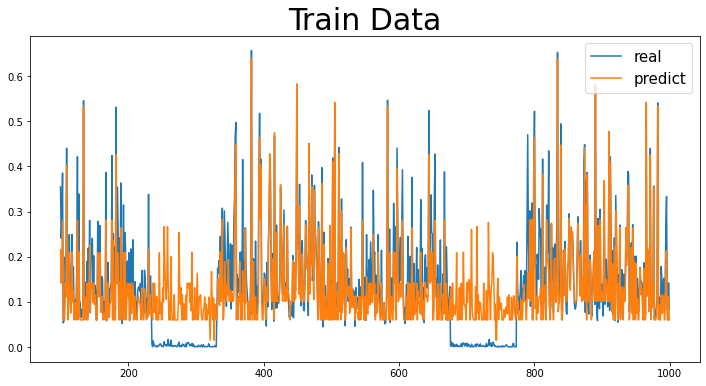

In [130]:
#Performance on training data
import time
training_time=[]
start_time = time.time()
rf=RandomForestRegressor(n_estimators=40, max_depth=6, min_samples_split=5)
model = rf.fit(X_train, y_train.values.ravel())
y_train_predict=model.predict(X_train)
end_time = time.time()
training_time.append(end_time-start_time)
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:1000,0].plot(figsize=(12,6))
draw.iloc[100:1000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') 

Text(0.5, 1.0, 'Test Data')

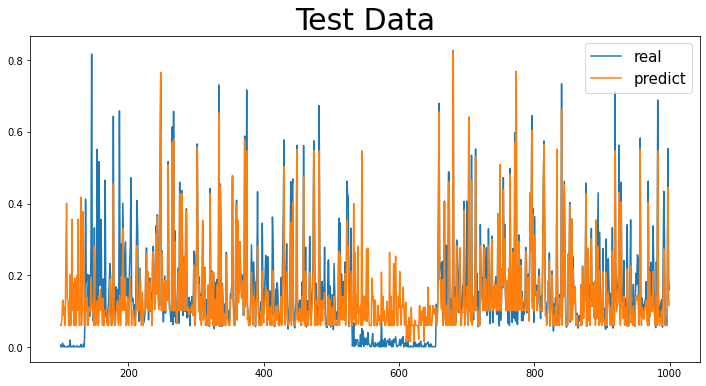

In [131]:
#Prediction on test data and its performance
testing_time=[]
start_time = time.time()
y_test_predict=model.predict(X_test)
end_time = time.time()
testing_time.append(end_time-start_time)
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[100:1000,0].plot(figsize=(12,6))
draw.iloc[100:1000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') 

In [41]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [87]:
import numpy as np
def mape(y_true, y_pred):
    y_true, y_pred=np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

In [132]:
#Results
training_MAE=[]
training_MSE=[]
training_RMSE=[]
testing_MAE=[]
testing_MSE=[]
testing_RMSE=[]

print('Training MAE:',mean_absolute_error(y_train_predict, y_train))
training_MAE.append(mean_absolute_error(y_train_predict, y_train))
print('Training MSE:',mean_squared_error(y_train_predict, y_train))
training_MSE.append(mean_squared_error(y_train_predict, y_train))
print('Training RMSE:',sqrt(mean_squared_error(y_train_predict, y_train)))
training_RMSE.append(sqrt(mean_squared_error(y_train_predict, y_train)))

print('Test MAE:',mean_absolute_error(y_test_predict, y_test))
testing_MAE.append(mean_absolute_error(y_test_predict, y_test))
print('Test MSE:',mean_squared_error(y_test_predict, y_test) )
testing_MSE.append(mean_squared_error(y_test_predict, y_test))
print('Test RMSE:',sqrt(mean_squared_error(y_test_predict, y_test)) )
testing_RMSE.append(sqrt(mean_squared_error(y_test_predict, y_test)) )

Training MAE: 0.05011929033658411
Training MSE: 0.005553095992215895
Training RMSE: 0.07451909817097825
Test MAE: 0.05592362449431346
Test MSE: 0.0072339391998645156
Test RMSE: 0.08505256727380142


### XGB

In [75]:
from xgboost import XGBRegressor
params = {
 'learning_rate':[0.05,0.10,0.15,0.20],
 'max_depth' : [ 3, 4, 5, 6, 8, 10],
 'min_child_weight' : [ 1, 3, 5],
 'gamma': [ 0.0, 0.1, 0.2]
}
model = XGBRegressor(objective='reg:squarederror', n_estimators=100)

In [ ]:
optparam={}
for i in tqdm(range(100)):
    rs_model=RandomizedSearchCV(model,param_distributions=params,cv=3,
                                n_iter=5,random_state=42, n_jobs=-1)
    rs_model.fit(X_train, y_train)
    optparam=rs_model.best_params_

In [77]:
optparam

{'min_child_weight': 1, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.2}

100%|█████████████████████████████████████████| 100/100 [25:29<00:00, 15.30s/it]


Text(0.5, 1.0, 'Train Data')

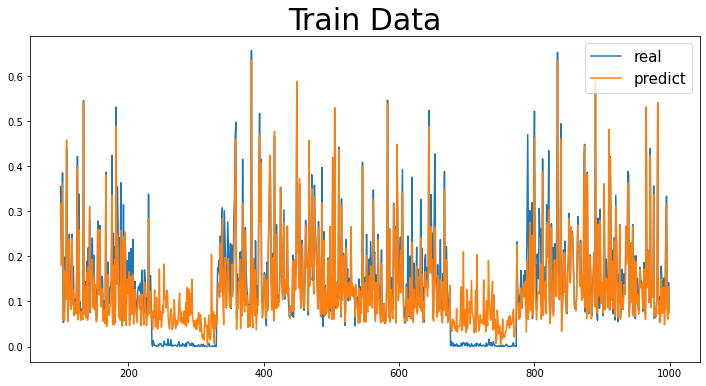

In [80]:
for i in tqdm(range(100)):
    xgbmodel = XGBRegressor(objective='reg:squarederror', n_estimators=100, min_child_weight=1, max_depth=10, 
                    learning_rate=0.1, gamma=0.2)
    xgbmodel.fit(X_train, y_train)

Text(0.5, 1.0, 'Train Data')

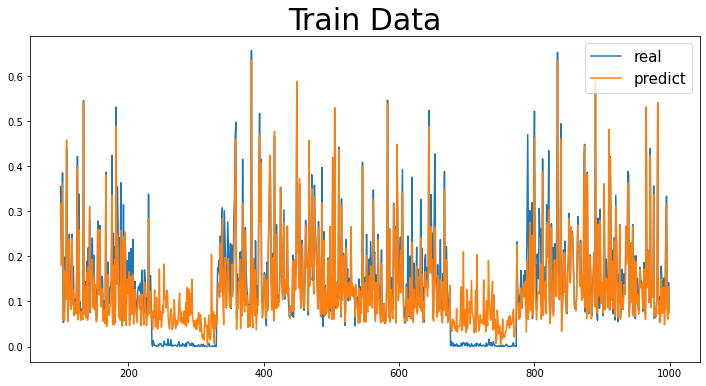

In [133]:
start_time=time.time()
xgbmodel = XGBRegressor(objective='reg:squarederror', n_estimators=100, min_child_weight=1, max_depth=10, 
                    learning_rate=0.1, gamma=0.2)
xgbmodel.fit(X_train, y_train)
y_train_predict=xgbmodel.predict(X_train)
end_time = time.time()
training_time.append(end_time-start_time)
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:1000,0].plot(figsize=(12,6))
draw.iloc[100:1000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') 

Text(0.5, 1.0, 'Test Data')

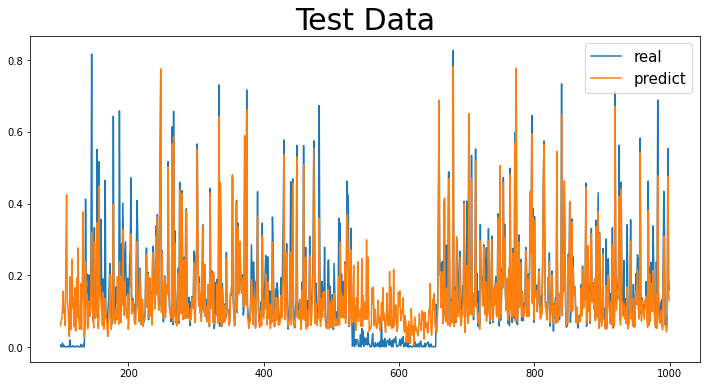

In [134]:
#Prediction on test data and its performance
start_time=time.time()
y_test_predict=xgbmodel.predict(X_test)
end_time = time.time()
testing_time.append(end_time-start_time)
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[100:1000,0].plot(figsize=(12,6))
draw.iloc[100:1000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') 

In [135]:
#Results
print('Training MAE:',mean_absolute_error(y_train_predict, y_train))
training_MAE.append(mean_absolute_error(y_train_predict, y_train))
print('Training MSE:',mean_squared_error(y_train_predict, y_train))
training_MSE.append(mean_squared_error(y_train_predict, y_train))
print('Training RMSE:',sqrt(mean_squared_error(y_train_predict, y_train)))
training_RMSE.append(sqrt(mean_squared_error(y_train_predict, y_train)))

print('Test MAE:',mean_absolute_error(y_test_predict, y_test))
testing_MAE.append(mean_absolute_error(y_test_predict, y_test))
print('Test MSE:',mean_squared_error(y_test_predict, y_test) )
testing_MSE.append(mean_squared_error(y_test_predict, y_test))
print('Test RMSE:',sqrt(mean_squared_error(y_test_predict, y_test)) )
testing_RMSE.append(sqrt(mean_squared_error(y_test_predict, y_test)) )

Training MAE: 0.035747055079136905
Training MSE: 0.002823506636035133
Training RMSE: 0.05313667882014393
Test MAE: 0.048856442625785756
Test MSE: 0.006473353899753191
Test RMSE: 0.08045715567774685


### SVR

In [101]:
from sklearn.svm import SVR
parameters = {'kernel': ('linear', 'rbf','poly'), 
            'C':[1.5, 10],
            'gamma': [1e-7, 1e-4],
            'epsilon':[0.1,0.2,0.3]}
svr = SVR()

In [119]:
for i in tqdm(range(100)):
    warnings.filterwarnings("ignore")
    svr_model=RandomizedSearchCV(svr,param_distributions=parameters,cv=3,
                                n_iter=5,n_jobs=-1)
    svr_model.fit(X_train, y_train.values.ravel())

100%|█████████████████████████████████████| 100/100 [11:07:23<00:00, 400.43s/it]


In [121]:
svr_model.best_params_

{'kernel': 'poly', 'gamma': 0.0001, 'epsilon': 0.1, 'C': 10}

Text(0.5, 1.0, 'Train Data')

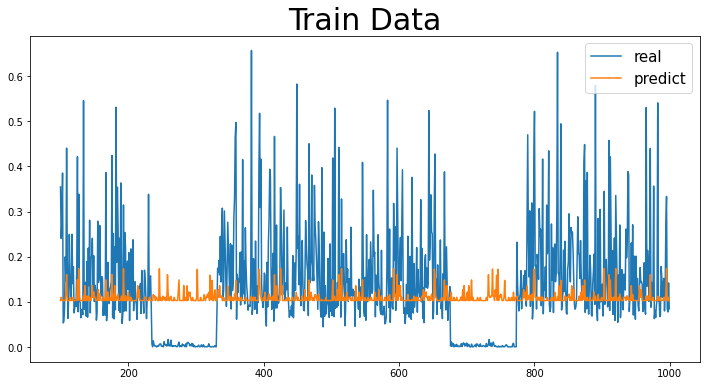

In [136]:
start_time=time.time()
svr_model = SVR(kernel='poly',gamma=0.0001, epsilon=0.1, C=10)
svr_model.fit(X_train, y_train)
y_train_predict=svr_model.predict(X_train)
end_time = time.time()
training_time.append(end_time-start_time)
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:1000,0].plot(figsize=(12,6))
draw.iloc[100:1000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') 

Text(0.5, 1.0, 'Test Data')

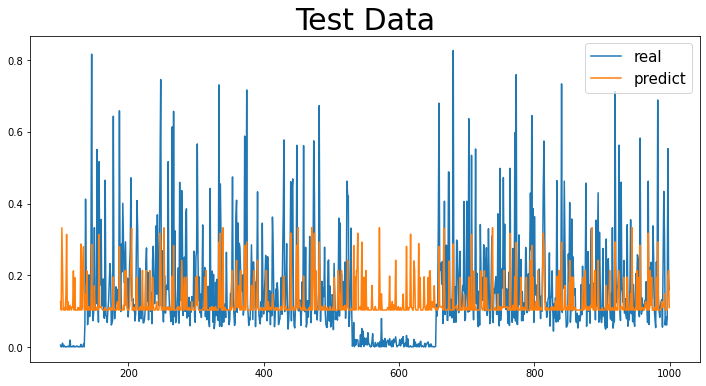

In [137]:
start_time=time.time()
y_test_predict=svr_model.predict(X_test)
end_time = time.time()
testing_time.append(end_time-start_time)
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[100:1000,0].plot(figsize=(12,6))
draw.iloc[100:1000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') 

In [138]:
#Results
print('Training MAE:',mean_absolute_error(y_train_predict, y_train))
training_MAE.append(mean_absolute_error(y_train_predict, y_train))
print('Training MSE:',mean_squared_error(y_train_predict, y_train))
training_MSE.append(mean_squared_error(y_train_predict, y_train))
print('Training RMSE:',sqrt(mean_squared_error(y_train_predict, y_train)))
training_RMSE.append(sqrt(mean_squared_error(y_train_predict, y_train)))

print('Test MAE:',mean_absolute_error(y_test_predict, y_test))
testing_MAE.append(mean_absolute_error(y_test_predict, y_test))
print('Test MSE:',mean_squared_error(y_test_predict, y_test) )
testing_MSE.append(mean_squared_error(y_test_predict, y_test))
print('Test RMSE:',sqrt(mean_squared_error(y_test_predict, y_test)) )
testing_RMSE.append(sqrt(mean_squared_error(y_test_predict, y_test)) )

Training MAE: 0.09337313417276712
Training MSE: 0.01786493023552511
Training RMSE: 0.1336597554820639
Test MAE: 0.09978444694102315
Test MSE: 0.02020006057949335
Test RMSE: 0.14212691715327308


In [140]:
print(training_time)
print(testing_time)

[14.730056285858154, 18.20398998260498, 154.8268699645996]
[0.12312698364257812, 0.08285212516784668, 41.035595178604126]


Text(0.5, 1.0, 'Running Time')

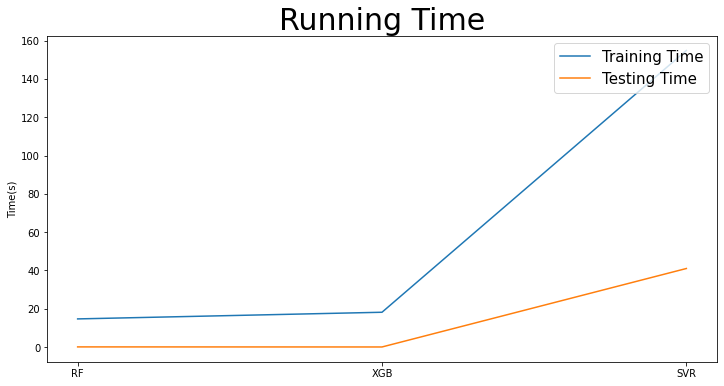

In [144]:
draw=pd.concat([pd.DataFrame(training_time),pd.DataFrame(testing_time)],axis=1)
draw.iloc[:,0].plot(figsize=(12,6))
draw.iloc[:,1].plot(figsize=(12,6))
plt.legend(('Training Time', 'Testing Time'),loc='upper right',fontsize='15')
x = np.array([0,1,2])
ticks=['RF', 'XGB', 'SVR']
plt.xticks(x,ticks)
plt.ylabel('Time(s)')
plt.title("Running Time",fontsize='30') 

In [146]:
print("Training")
print(training_MAE)
print(training_MSE)
print(training_RMSE)

print("Testing")
print(testing_MAE)
print(testing_MSE)
print(testing_RMSE)

Training
[0.05011929033658411, 0.035747055079136905, 0.09337313417276712]
[0.005553095992215895, 0.002823506636035133, 0.01786493023552511]
[0.07451909817097825, 0.05313667882014393, 0.1336597554820639]
Testing
[0.05592362449431346, 0.048856442625785756, 0.09978444694102315]
[0.0072339391998645156, 0.006473353899753191, 0.02020006057949335]
[0.08505256727380142, 0.08045715567774685, 0.14212691715327308]


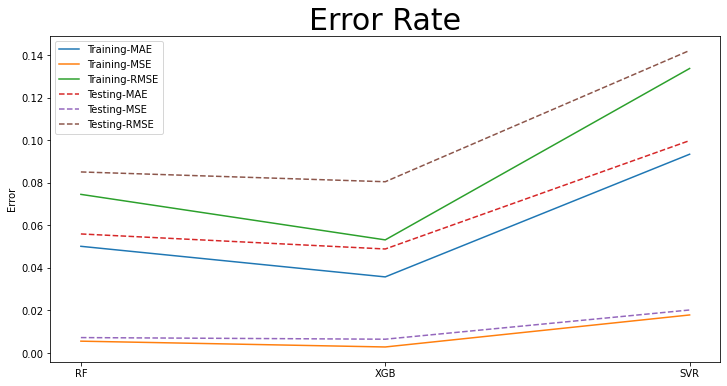

In [153]:
x = [0,1,2]
  
# plot lines
plt.figure(figsize=(12,6))
plt.plot(x, training_MAE, label = "Training-MAE")
plt.plot(x, training_MSE, label = "Training-MSE")
plt.plot(x, training_RMSE, label = "Training-RMSE")
plt.plot(x, testing_MAE, '--', label = "Testing-MAE")
plt.plot(x, testing_MSE, '--', label = "Testing-MSE")
plt.plot(x, testing_RMSE, '--', label = "Testing-RMSE")

ticks=['RF', 'XGB', 'SVR']
plt.xticks(x,ticks)
plt.ylabel('Error')
plt.title("Error Rate",fontsize='30') 
plt.legend()
plt.show()


Text(0.5, 1.0, 'Train Data')

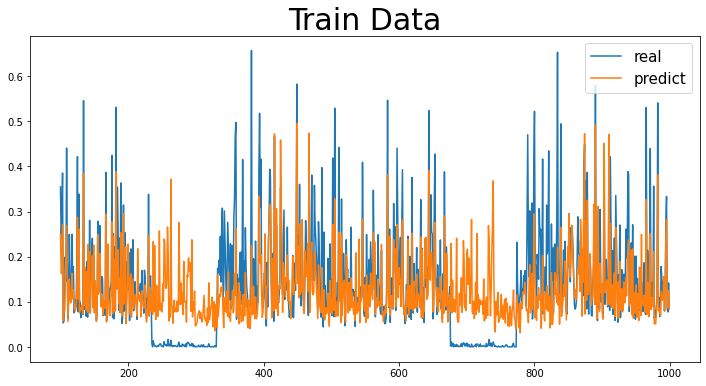

In [154]:
start_time=time.time()
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_train_predict=svr_model.predict(X_train)
end_time = time.time()
training_time.append(end_time-start_time)
draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
draw.iloc[100:1000,0].plot(figsize=(12,6))
draw.iloc[100:1000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Train Data",fontsize='30') 

Text(0.5, 1.0, 'Test Data')

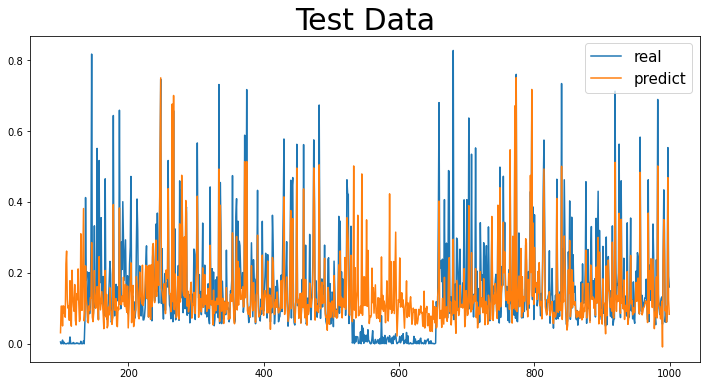

In [155]:
start_time=time.time()
y_test_predict=svr_model.predict(X_test)
end_time = time.time()
testing_time.append(end_time-start_time)
draw=pd.concat([pd.DataFrame(y_test),pd.DataFrame(y_test_predict)],axis=1);
draw.iloc[100:1000,0].plot(figsize=(12,6))
draw.iloc[100:1000,1].plot(figsize=(12,6))
plt.legend(('real', 'predict'),loc='upper right',fontsize='15')
plt.title("Test Data",fontsize='30') 

In [156]:
#Results
print('Training MAE:',mean_absolute_error(y_train_predict, y_train))
training_MAE.append(mean_absolute_error(y_train_predict, y_train))
print('Training MSE:',mean_squared_error(y_train_predict, y_train))
training_MSE.append(mean_squared_error(y_train_predict, y_train))
print('Training RMSE:',sqrt(mean_squared_error(y_train_predict, y_train)))
training_RMSE.append(sqrt(mean_squared_error(y_train_predict, y_train)))

print('Test MAE:',mean_absolute_error(y_test_predict, y_test))
testing_MAE.append(mean_absolute_error(y_test_predict, y_test))
print('Test MSE:',mean_squared_error(y_test_predict, y_test) )
testing_MSE.append(mean_squared_error(y_test_predict, y_test))
print('Test RMSE:',sqrt(mean_squared_error(y_test_predict, y_test)) )
testing_RMSE.append(sqrt(mean_squared_error(y_test_predict, y_test)) )

Training MAE: 0.06769466813974755
Training MSE: 0.009904726369203358
Training RMSE: 0.09952249177549444
Test MAE: 0.07924605243081172
Test MSE: 0.013343815961955337
Test RMSE: 0.115515436033265
